## Unsupervised Learning: Clustering

Just a few words before we start. This topic is very import and interesting and worth spending some time to read about it. There is a fantastic Yorko's tutorial on unsupervised learning [www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering](http://), still there are some clustering techniques, which were not covered in that tutorial. My tutorial is a brief overview of clustering methods provided by sklearn library in Python, which were not listed in Yorko's kernel.

Looking forward to seeing your feedback. Enjoy!

## Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import datasets
from sklearn.cluster import KMeans, MeanShift, DBSCAN, Birch
from sklearn import metrics

## Data

In order to make it easy to compare results of this tutorial with Yorko's I will use the same dataset, MNIST dataset.

In [2]:
data = datasets.load_digits()
X, y = data.data, data.target
X.shape, y.shape

((1797, 64), (1797,))

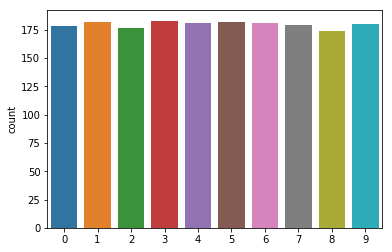

In [3]:
sns.countplot(y);

As you can see we need to take care of ideally balanced multiclass data set. Now let's visualize our data.

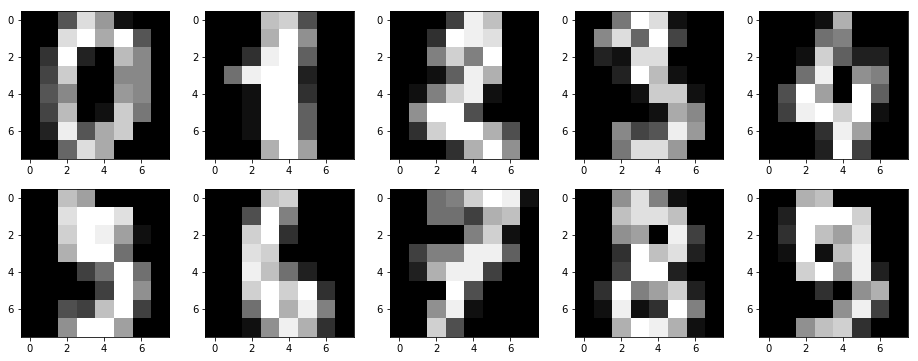

In [4]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray');

## Clustering Methods

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png" width="750px"/>

### K-Means

The most well known clustering algorithm is definitely K-means. It was discussed in Yorko's tutorial, so I will not pay too much attention to this method, I will remind it's basic steps, and later K-means will be used as a baseline model. It is easy to undersatnd and easy to implement K-means. K-means tries to choose centroids ('means') in order to minimize within-cluster inertia.

Basic iterations of K-means look like this:

1. We randomly initialize K cluster centers. Centers of clusters are simply some of the observation from given dataset;
2. For each observation from dataset is computed the distance between one and all clusters' centers. Observations relate to a cluster, which centers is the closest to them;
3. Centers of clusters are recomputed based on values of all data points within a given cluster;
4. Steps 2-3 are repeated until convergence is not reached.

<img src="https://cdn-images-1.medium.com/max/800/1*KrcZK0xYgTa4qFrVr0fO2w.gif" width="350px"/>

**Advantages:**

1. Simplicity - It's easy to understand and interpret;
2. Speed - Algorithm will converge very fast, comparing to other methods;

**Drawbacks:**

1. There is need to specify number of clusters;
2. Algorithm starts from random points, which may lead to different results.

### Mean-Shift

Mean-shift is a clustering algorithm, which aims to locate centers of clusters in the most dense area of data points. Mean-shift starts from a ramdom point, where it locates a circular sliding window of radius r (which is a parameter we are able to specify). Mean-shift is shifting step-by-step center point to a region with higher density. The algorithm will shift the sliding window untill he can not find a direction with higher density of data points. When multiple sliding windows iverlap each other, then the window, which contains the biggest number of data points, is choosed as a final cluster.

<img src="https://cdn-images-1.medium.com/max/800/1*vyz94J_76dsVToaa4VG1Zg.gif" width="350px"/>

**Advantages:**

1. There is no need to specify number of clusters;
2. Algorithm is guaranteed to converge;

**Drawbacks:**

1. Algorithm is mot highly scalable;
2. In sklearn there is no need to specify r, still selection of this parameter is not trivial.

### DBSCAN

DBSCAN is a clustering algorithm, which core idea is finding high density area. So it is quite similar to Mean-shift, still there is a difference between them. DBSCAN works this way:

1. DBSCAN starts with an arbitrary data point, which is not labeled as visited. Using parameter epsilon, which has to be set by user, an algorithm extracts the neighborhood of this data point. Neighborhood are all points within distance epsilon.
2. There is one more parameter, which has to be set - min_samples. If there are min_samples within neighborhood, than starts clustering process, and this data point becomes the first data point in cluster. If there are less data pioint in neighborhood than min_samples, than this data point is labeled as outlier, but it is also labeled as visited.
3. For the first data point belonging to a cluster all data points in it's neighborhood also become part of this cluster.
4. The process from 2-3 is repetated for all data points in cluster, untill there are no unvisited data points.
5. When the algorithm managed to visit all data points in the first cluster, it starts with another arbitrary data point, which has not been visited. Then process from 2-4 is repeated for all new clusters. In the end there are no unvisited data points, all of them belong to some clusters or labeled as outliers.

<img src="https://cdn-images-1.medium.com/max/1600/1*tc8UF-h0nQqUfLC8-0uInQ.gif" width="550px"/>

**Advantages:**

1. There is no need to specify number of clusters;
2. Algorithm is able to identify outliers;
3. Algorithm is capabale of finding cluster of arbitrary shape and size;

**Drawbacks:**

1. It is not easy to estimate **epsilon** and **min_samples**;
2. Algorithm does not perform well on data with varying density.

### Birch

Birch is a clustering algorithm, which can handle a large amount of data. Birch builds so called Characteristic Feature Tree (CFT) to form a set of Characteristic Feature Nodes (CFN). Inside CFN there are some Characteristic Feature Subclusters (CFS), which hold sufficient information about data. As you can see there is no need to store all the data in memory, because every valuable information can be found in CFS, thus Birch algorithm can be thought as a data reduction method CFS contains information:

1. Number of samples in a subcluster;
2. Linear Sum - A n-dimensional vector holding the sum of all samples;
3. Squared Sum - Sum of the squared L2 norm of all samples;
4. Centroids - To avoid recalculation linear sum / n_samples;
5. Squared norm of the centroids.

**Advantages:**

1. Birch can handle large datasets;

**Drawbacks:**

1. There is need to specify number of clusters;
2. Apart from number of clusters we have to specify two more parameters;
3. Birch doesn't perform well on high dimensional data (if there are >20 features, you'd better use something else).

## Clustering performance evaluation

| Metric Name | Knowledge of Groud Truth |
|---|---|
| Adjusted Rand index | Yes |
| Mutual Information based scores | Yes |
| Homogeneity, completeness and V-measure | Yes |
| Fowlkes-Mallows scores | Yes |
| Silhouette Coefficient | No |
| Calinski-Harabaz Index | No |
| Davies-Bouldin Index | No |
| Contingency Matrix | Yes |

## Comparing clustering algorithms

In [5]:
output = pd.DataFrame(index=['K-Means','Mean-Shift','DBSCAN','Birch'],
                      columns=['ARI','MI','HCV','FM','SC','CH','DB'])

### K-Means

In [6]:
# Fitting K-Means to data
clust_model = KMeans(n_clusters=10, random_state=17)
clust_model.fit(X)
# Evaluating model's performance
labels = clust_model.labels_
output.loc['K-Means','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['K-Means','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['K-Means','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['K-Means','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['K-Means','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['K-Means','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['K-Means','DB'] = metrics.davies_bouldin_score(X, labels)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


### Mean-shift

As you can see one of Mean-Shift drawbacks come to an action: we need to specify bandwidth here, which might be challenging.

In [7]:
result = []
for bw in tqdm_notebook(np.linspace(5,50,10)):
    clust_model = MeanShift(bandwidth=bw)
    clust_model.fit(X)
    labels = clust_model.labels_
    result.append(metrics.adjusted_rand_score(y, labels))
res = pd.DataFrame(index=np.linspace(5,50,10))
res['Score'] = result
res

,Score
5.0,0.000000
10.0,0.000460
15.0,0.038013
20.0,0.353279
25.0,0.633036
30.0,0.435410
35.0,0.000000
40.0,0.000000
45.0,0.000000
50.0,0.000000


In [8]:
result = []
for bw in tqdm_notebook(np.linspace(21,29,9)):
    clust_model = MeanShift(bandwidth=bw)
    clust_model.fit(X)
    labels = clust_model.labels_
    result.append(metrics.adjusted_rand_score(y, labels))
res = pd.DataFrame(index=np.linspace(21,29,9))
res['Score'] = result
res

,Score
21.0,0.428874
22.0,0.504613
23.0,0.565381
24.0,0.611518
25.0,0.633036
26.0,0.658008
27.0,0.574749
28.0,0.575926
29.0,0.614136


In [9]:
# Fitting Mean-Shift to data
clust_model = MeanShift(bandwidth=26)
clust_model.fit(X)
# Evaluating model's performance
labels = clust_model.labels_
output.loc['Mean-Shift','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['Mean-Shift','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['Mean-Shift','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['Mean-Shift','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['Mean-Shift','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['Mean-Shift','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['Mean-Shift','DB'] = metrics.davies_bouldin_score(X, labels)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


### DBSCAN

Here we need to specify even more parameters... this task becomes even more challenging. Default parameters perform very poor, so I will try something custom, but I'm hopeless to reach good performnce.

In [10]:
# Fitting DBSCAN to data
clust_model = DBSCAN(min_samples=2, eps=10)
clust_model.fit(X)
# Evaluating model's performance
labels = clust_model.labels_
output.loc['DBSCAN','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['DBSCAN','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['DBSCAN','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['DBSCAN','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['DBSCAN','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['DBSCAN','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['DBSCAN','DB'] = metrics.davies_bouldin_score(X, labels)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


### Birch

And finally **Birch** with 3 parameters to specify... Luckily, we know, that we have 10 digits (clusters), so there are only 2 parameters left. In this case I will use defaul parameters.

In [11]:
# Fitting Birch to data
clust_model = Birch(n_clusters=10)
clust_model.fit(X)
# Evaluating model's performance
labels = clust_model.labels_
output.loc['Birch','ARI'] = metrics.adjusted_rand_score(y, labels)
output.loc['Birch','MI'] = metrics.adjusted_mutual_info_score(y, labels)
output.loc['Birch','HCV'] = metrics.homogeneity_score(y, labels)
output.loc['Birch','FM'] = metrics.fowlkes_mallows_score(y, labels)
output.loc['Birch','SC'] = metrics.silhouette_score(X, labels, metric='euclidean')
output.loc['Birch','CH'] = metrics.calinski_harabaz_score(X, labels)
output.loc['Birch','DB'] = metrics.davies_bouldin_score(X, labels)

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


## Conclusion

In [12]:
output

,ARI,MI,HCV,FM,SC,CH,DB
K-Means,0.668044,0.740053,0.74263,0.702149,0.182509,169.372,1.92468
Mean-Shift,0.658008,0.685107,0.83186,0.691674,0.105164,52.336,1.66517
DBSCAN,0.000193454,0.0064075,0.0191008,0.309772,-0.303335,2.45077,1.12017
Birch,0.794003,0.856085,0.857513,0.816752,0.178497,161.205,1.88899


As we can see Birch method performed best. As for me, Birch is the most complicated algorithm from all described in this tutorial, so it worth spending more time to study Birch better.

## Useful links

1. https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering
2. https://scikit-learn.org/stable/modules/clustering